# Ejercicio SVM datos Eurocopa 2012
A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

## 1. Importa las librerias necesarias

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
%matplotlib inline

## 2. Carga los datos

In [3]:
df = pd.read_csv('./data/Euro_2012_stats_TEAM.csv')
df.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [4]:
df.index

RangeIndex(start=0, stop=16, step=1)

In [5]:
df.shape

(16, 35)

In [6]:
df.set_index('Team', drop=True, inplace=True)

In [7]:
df.head()

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Team,,,,,,,,,,,,,,,,,,,,,
Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,...,13,81.3%,41,62,2,9,0,9,9,16
Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,...,10,66.7%,25,38,8,4,0,7,7,15
England,5,11,18,50.0%,17.2%,40,0,0,0,3,...,22,88.1%,43,45,6,5,0,11,11,16
France,3,22,24,37.9%,6.5%,65,1,0,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


## 3. Obtener la matriz de correlación con TODAS las variables. ¿Hay algunas columnas que estén muy correlacionadas?

In [8]:
# 1.- Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?
df_corr = df.corr()
df_corr

,Goals,Shots on target,Shots off target,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,...,Goals conceded,Saves made,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Goals,1.000000,0.804193,0.403821,0.650109,0.200512,0.730437,0.023094,0.349330,0.838497,0.830062,...,-0.337689,0.143912,0.663876,0.483833,0.703043,0.337709,-3.580574e-01,0.727830,0.727830,0.136067
Shots on target,0.804193,1.000000,0.611185,0.886090,0.212932,0.478610,-0.229945,0.210571,0.930337,0.923242,...,-0.214415,0.085059,0.765949,0.658353,0.696263,0.544307,-3.340500e-01,0.821342,0.821342,0.249516
Shots off target,0.403821,0.611185,1.000000,0.887032,0.581655,0.126783,-0.173221,0.002284,0.624451,0.612998,...,-0.139274,0.086157,0.615058,0.434815,0.344626,0.534186,-3.377661e-01,0.544974,0.544974,0.045973
Total shots (inc. Blocked),0.650109,0.886090,0.887032,1.000000,0.400121,0.299397,-0.234668,0.125738,0.875698,0.864279,...,-0.184740,0.148269,0.766215,0.623288,0.589635,0.622268,-3.604662e-01,0.763336,0.763336,0.157812
Hit Woodwork,0.200512,0.212932,0.581655,0.400121,1.000000,-0.076923,-0.041345,0.020174,0.095882,0.073814,...,0.062541,-0.230524,0.141180,0.303987,0.113657,0.319708,-2.820513e-01,0.204511,0.204511,-0.189466
Penalty goals,0.730437,0.478610,0.126783,0.299397,-0.076923,1.000000,0.537484,-0.020174,0.545294,0.550720,...,-0.020847,0.058761,0.528185,0.114404,0.627220,0.085467,1.794872e-01,0.531727,0.531727,0.351866
Penalties not scored,0.023094,-0.229945,-0.173221,-0.234668,-0.041345,0.537484,1.000000,-0.357830,-0.169613,-0.179278,...,0.302532,0.051019,0.163643,-0.107169,0.210417,0.127603,5.374838e-01,0.084796,0.084796,0.480079
Headed goals,0.349330,0.210571,0.002284,0.125738,0.020174,-0.020174,-0.357830,1.000000,0.213073,0.200605,...,-0.344447,0.458773,0.157215,0.117445,0.188786,0.067245,-3.429623e-01,0.216077,0.216077,-0.447214
Passes,0.838497,0.930337,0.624451,0.875698,0.095882,0.545294,-0.169613,0.213073,1.000000,0.997697,...,-0.284982,0.207240,0.773382,0.549248,0.731938,0.465799,-4.002506e-01,0.800546,0.800546,0.232214
Passes completed,0.830062,0.923242,0.612998,0.864279,0.073814,0.550720,-0.179278,0.200605,0.997697,1.000000,...,-0.300837,0.184878,0.738845,0.499351,0.704802,0.420410,-4.062897e-01,0.766326,0.766326,0.213345


In [9]:
df_high_corr = df_corr[(df_corr > 0.5) | (df_corr < -0.5)  ]
df_high_corr

,Goals,Shots on target,Shots off target,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,...,Goals conceded,Saves made,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Goals,1.000000,0.804193,NaN,0.650109,NaN,0.730437,NaN,NaN,0.838497,0.830062,...,NaN,NaN,0.663876,NaN,0.703043,NaN,NaN,0.727830,0.727830,NaN
Shots on target,0.804193,1.000000,0.611185,0.886090,NaN,NaN,NaN,NaN,0.930337,0.923242,...,NaN,NaN,0.765949,0.658353,0.696263,0.544307,NaN,0.821342,0.821342,NaN
Shots off target,NaN,0.611185,1.000000,0.887032,0.581655,NaN,NaN,NaN,0.624451,0.612998,...,NaN,NaN,0.615058,NaN,NaN,0.534186,NaN,0.544974,0.544974,NaN
Total shots (inc. Blocked),0.650109,0.886090,0.887032,1.000000,NaN,NaN,NaN,NaN,0.875698,0.864279,...,NaN,NaN,0.766215,0.623288,0.589635,0.622268,NaN,0.763336,0.763336,NaN
Hit Woodwork,NaN,NaN,0.581655,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Penalty goals,0.730437,NaN,NaN,NaN,NaN,1.000000,0.537484,NaN,0.545294,0.550720,...,NaN,NaN,0.528185,NaN,0.627220,NaN,NaN,0.531727,0.531727,NaN
Penalties not scored,NaN,NaN,NaN,NaN,NaN,0.537484,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.537484,NaN,NaN,NaN
Headed goals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Passes,0.838497,0.930337,0.624451,0.875698,NaN,0.545294,NaN,NaN,1.000000,0.997697,...,NaN,NaN,0.773382,0.549248,0.731938,NaN,NaN,0.800546,0.800546,NaN
Passes completed,0.830062,0.923242,0.612998,0.864279,NaN,0.550720,NaN,NaN,0.997697,1.000000,...,NaN,NaN,0.738845,NaN,0.704802,NaN,NaN,0.766326,0.766326,NaN


<AxesSubplot:>

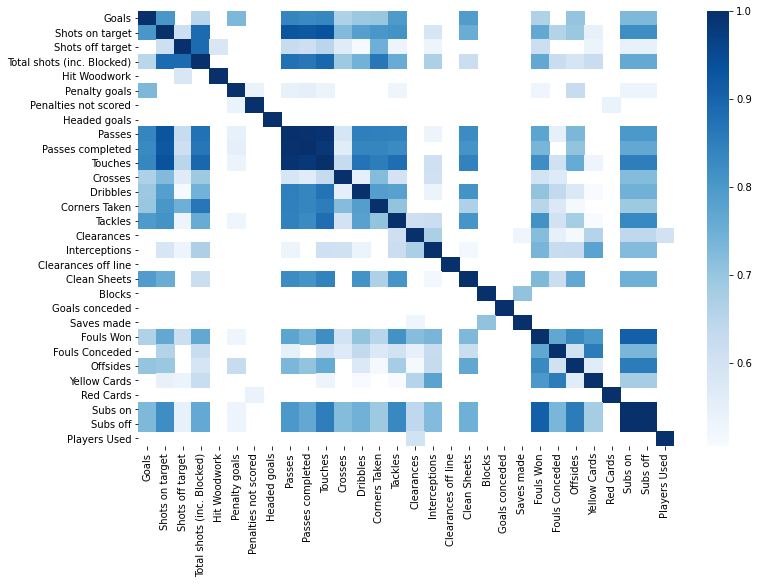

In [10]:
plt.subplots(figsize=(12,8))
sns.heatmap(df_high_corr, cmap='Blues')

In [11]:
df_high_corr.isnull().sum()

Goals                         14
Shots on target               11
Shots off target              14
Total shots (inc. Blocked)    11
Hit Woodwork                  28
Penalty goals                 19
Penalties not scored          27
Headed goals                  29
Passes                        11
Passes completed              13
Touches                       10
Crosses                       14
Dribbles                      11
Corners Taken                 13
Tackles                        9
Clearances                    19
Interceptions                 13
Clearances off line           29
Clean Sheets                  14
Blocks                        28
Goals conceded                29
Saves made                    27
Fouls Won                      9
Fouls Conceded                13
Offsides                      11
Yellow Cards                  16
Red Cards                     28
Subs on                        9
Subs off                       9
Players Used                  28
dtype: int

In [12]:
#Get best correlation between features 
best_corr_features = []
columns = []
for col in df_high_corr.columns:
    rows = list((df_high_corr[col][~(df_high_corr[col].isnull())]).index)
    for row in rows:
        if (df_high_corr.loc[row,col]) != 1.0:
                if not(row in columns):
                    columns.append(col)
                    best_corr_features.append((row,col))
                    print([row,col,df_high_corr.loc[row,col]],'\n')
    

['Shots on target', 'Goals', 0.8041927635169258] 

['Total shots (inc. Blocked)', 'Goals', 0.6501087908995742] 

['Penalty goals', 'Goals', 0.7304371715202215] 

['Passes', 'Goals', 0.8384971612206693] 

['Passes completed', 'Goals', 0.8300615030546331] 

['Touches', 'Goals', 0.8377604563173091] 

['Crosses', 'Goals', 0.6670970176960289] 

['Dribbles', 'Goals', 0.693998310374188] 

['Corners Taken', 'Goals', 0.6972395729898169] 

['Tackles', 'Goals', 0.7968302264939648] 

['Clean Sheets', 'Goals', 0.7925593832261717] 

['Fouls Won', 'Goals', 0.6638759286651713] 

['Offsides', 'Goals', 0.7030430450202517] 

['Subs on', 'Goals', 0.7278298918918428] 

['Subs off', 'Goals', 0.7278298918918428] 

['Shots off target', 'Shots on target', 0.6111850958875084] 

['Total shots (inc. Blocked)', 'Shots on target', 0.8860900801499829] 

['Passes', 'Shots on target', 0.9303372646441443] 

['Passes completed', 'Shots on target', 0.9232415575195931] 

['Touches', 'Shots on target', 0.9346231391147478] 

In [13]:
best_corr_features

[('Shots on target', 'Goals'),
 ('Total shots (inc. Blocked)', 'Goals'),
 ('Penalty goals', 'Goals'),
 ('Passes', 'Goals'),
 ('Passes completed', 'Goals'),
 ('Touches', 'Goals'),
 ('Crosses', 'Goals'),
 ('Dribbles', 'Goals'),
 ('Corners Taken', 'Goals'),
 ('Tackles', 'Goals'),
 ('Clean Sheets', 'Goals'),
 ('Fouls Won', 'Goals'),
 ('Offsides', 'Goals'),
 ('Subs on', 'Goals'),
 ('Subs off', 'Goals'),
 ('Shots off target', 'Shots on target'),
 ('Total shots (inc. Blocked)', 'Shots on target'),
 ('Passes', 'Shots on target'),
 ('Passes completed', 'Shots on target'),
 ('Touches', 'Shots on target'),
 ('Crosses', 'Shots on target'),
 ('Dribbles', 'Shots on target'),
 ('Corners Taken', 'Shots on target'),
 ('Tackles', 'Shots on target'),
 ('Interceptions', 'Shots on target'),
 ('Clean Sheets', 'Shots on target'),
 ('Fouls Won', 'Shots on target'),
 ('Fouls Conceded', 'Shots on target'),
 ('Offsides', 'Shots on target'),
 ('Yellow Cards', 'Shots on target'),
 ('Subs on', 'Shots on target'),
 

In [14]:
#Get best features correlation with 'target'
corr_features_target = np.abs(df_corr['Goals']).sort_values(ascending=False)
corr_features_target

Goals                         1.000000
Passes                        0.838497
Touches                       0.837760
Passes completed              0.830062
Shots on target               0.804193
Tackles                       0.796830
Clean Sheets                  0.792559
Penalty goals                 0.730437
Subs on                       0.727830
Subs off                      0.727830
Offsides                      0.703043
Corners Taken                 0.697240
Dribbles                      0.693998
Crosses                       0.667097
Fouls Won                     0.663876
Total shots (inc. Blocked)    0.650109
Fouls Conceded                0.483833
Interceptions                 0.482441
Shots off target              0.403821
Red Cards                     0.358057
Headed goals                  0.349330
Yellow Cards                  0.337709
Goals conceded                0.337689
Clearances                    0.255700
Hit Woodwork                  0.200512
Clearances off line      

In [15]:
keep_features = corr_features_target[corr_features_target > 0.3 ].index

corr_features_target[keep_features]

Goals                         1.000000
Passes                        0.838497
Touches                       0.837760
Passes completed              0.830062
Shots on target               0.804193
Tackles                       0.796830
Clean Sheets                  0.792559
Penalty goals                 0.730437
Subs on                       0.727830
Subs off                      0.727830
Offsides                      0.703043
Corners Taken                 0.697240
Dribbles                      0.693998
Crosses                       0.667097
Fouls Won                     0.663876
Total shots (inc. Blocked)    0.650109
Fouls Conceded                0.483833
Interceptions                 0.482441
Shots off target              0.403821
Red Cards                     0.358057
Headed goals                  0.349330
Yellow Cards                  0.337709
Goals conceded                0.337689
Name: Goals, dtype: float64

In [16]:
# 2.- ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos
'''
- % de goles por disparo: 40%
- Total shots (inc. Blocked): 102
- Corners Taken: 5
- Passes: 82
- Dribbles: 23 
'''


df_shooting = df[['Passes', 'Shots on target', 'Goals']]
df_shooting.head()

,Passes,Shots on target,Goals
Team,,,
Croatia,1076,13,4
Czech Republic,1565,13,4
Denmark,1298,10,4
England,1488,11,5
France,2066,22,3


In [17]:
#df_shooting['precision'] = df_shooting['Shots on target']/(df_shooting['Shots on target'] + df_shooting['Shots off target'])
df_shooting.insert(loc=2, column='precision', value=(df_shooting['Goals']/(df_shooting['Goals'] + df_shooting['Shots on target']))*100)
print(df_shooting.shape)
df_shooting

(16, 4)


,Passes,Shots on target,precision,Goals
Team,,,,
Croatia,1076,13,23.529412,4
Czech Republic,1565,13,23.529412,4
Denmark,1298,10,28.571429,4
England,1488,11,31.250000,5
France,2066,22,12.000000,3
Germany,2774,32,23.809524,10
Greece,1187,8,38.461538,5
Italy,3016,34,15.000000,6
Netherlands,1556,12,14.285714,2


<AxesSubplot:xlabel='precision', ylabel='Goals'>

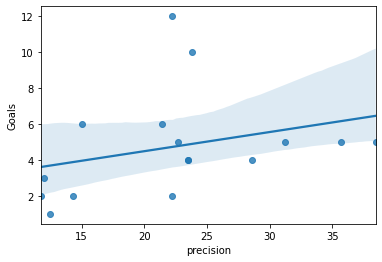

In [18]:
sns.regplot(x='precision',y='Goals', data=df_shooting)

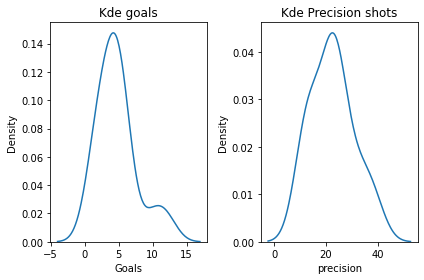

In [19]:
plt.subplot(1,2,1)
sns.kdeplot(x='Goals', data=df_shooting)
plt.title('Kde goals')

plt.subplot(1,2,2)
sns.kdeplot(x='precision', data=df_shooting)
plt.title('Kde Precision shots')

plt.tight_layout()

In [20]:
from scipy.stats import shapiro
#Check p_value of 'goals' and 'precision shots'
print('Shapiro "Goals": ', shapiro(df_shooting['Goals']).pvalue )
print('Shapiro "precision":', shapiro(df_shooting['precision']).pvalue)

Shapiro "Goals":  0.03050091303884983
Shapiro "precision": 0.20244888961315155


In [21]:
df_shooting['goals_log'] = np.log(df_shooting['Goals'])
df_shooting

,Passes,Shots on target,precision,Goals,goals_log
Team,,,,,
Croatia,1076,13,23.529412,4,1.386294
Czech Republic,1565,13,23.529412,4,1.386294
Denmark,1298,10,28.571429,4,1.386294
England,1488,11,31.250000,5,1.609438
France,2066,22,12.000000,3,1.098612
Germany,2774,32,23.809524,10,2.302585
Greece,1187,8,38.461538,5,1.609438
Italy,3016,34,15.000000,6,1.791759
Netherlands,1556,12,14.285714,2,0.693147


In [22]:
#inverse np.log(df_[column]) = np.exp(np.log(df_[column]))
round(np.exp(df_shooting['goals_log']),5) == df_shooting['Goals']

Team
Croatia                True
Czech Republic         True
Denmark                True
England                True
France                 True
Germany                True
Greece                 True
Italy                  True
Netherlands            True
Poland                 True
Portugal               True
Republic of Ireland    True
Russia                 True
Spain                  True
Sweden                 True
Ukraine                True
dtype: bool

In [23]:
print('P_value shapiro log_goals:', shapiro(df_shooting ['goals_log']).pvalue)

P_value shapiro log_goals: 0.46953389048576355


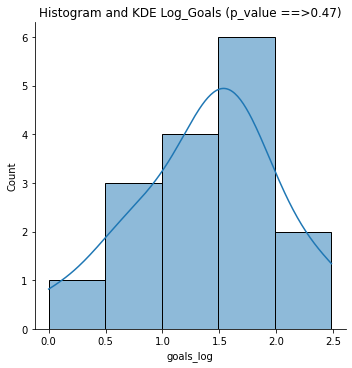

In [24]:
sns.displot(data= df_shooting['goals_log'], kde=True)
plt.title('Histogram and KDE Log_Goals (p_value ==>'+str(round(shapiro(df_shooting ['goals_log']).pvalue, 3))+')');

In [25]:
X = df_shooting['precision'].to_numpy().reshape(-1,1)
y = df_shooting['Goals'].to_numpy().reshape(-1,1)
print(X.shape)
print(y.shape)

(16, 1)
(16, 1)


In [26]:
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20,
                                                    random_state = 42)

print('Shape features_train ', X_train.shape)
print('Shape label_train ', y_train.shape)
print('Shape features_test ', X_test.shape)
print('Shape label_train ', y_test.shape)
'''


"\nX_train, X_test, y_train, y_test = train_test_split(X, y, \n                                                    test_size = 0.20,\n                                                    random_state = 42)\n\nprint('Shape features_train ', X_train.shape)\nprint('Shape label_train ', y_train.shape)\nprint('Shape features_test ', X_test.shape)\nprint('Shape label_train ', y_test.shape)\n"

In [22]:
# 2.2.- usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

In [25]:
#Regresión Lineal
lin_reg = LinearRegression()

lin_reg.fit(X,y)
lin_reg_pred = lin_reg.predict(X)
lin_reg_pred

array([[4.86633314],
       [4.86633314],
       [5.40401553],
       [5.6896593 ],
       [3.63683274],
       [4.89620439],
       [6.45870022],
       [3.95675377],
       [3.88058209],
       [3.6117409 ],
       [4.64229881],
       [3.69015291],
       [6.16573226],
       [4.72693401],
       [4.78079276],
       [4.72693401]])

In [26]:
mse = mean_squared_error(y, lin_reg_pred)
print('MSE LinearRegressor',mse)

MSE LinearRegressor 7.103757337639538


In [27]:
X = df_shooting['precision'].to_numpy().reshape(-1,1)
y = df_shooting['goals_log'].to_numpy().reshape(-1,1)
print(X.shape)
print(y.shape)

(16, 1)
(16, 1)


In [28]:
#Regresión Lineal
lin_reg = LinearRegression()

lin_reg.fit(X,y)
lin_reg_pred = np.exp(lin_reg.predict(X))
lin_reg_pred

array([[4.1522287 ],
       [4.1522287 ],
       [4.98479063],
       [5.49300415],
       [2.73399973],
       [4.1945992 ],
       [7.13387851],
       [3.0480426 ],
       [2.9701444 ],
       [2.71078289],
       [3.84779781],
       [2.78399784],
       [6.45775555],
       [3.96008935],
       [4.03324786],
       [3.96008935]])

In [29]:
mse = mean_squared_error(y, lin_reg_pred)
print('MSE LinearRegressor(log_target):',mse)

MSE LinearRegressor(log_target): 9.071723119394978


In [30]:
X = df_shooting['precision'].to_numpy().reshape(-1,1)
y = df_shooting['Goals'].to_numpy().reshape(-1,1)

In [31]:
#Regresión no Lineal con polinomio
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svm_poly = SVR(kernel='poly', degree=2, gamma='auto')

svm_poly_param = {
                'coef0':[0.1,0.25,0.5,1],
                'C':[0.1,1,5,25,100]
                }

grid_svm_poly = GridSearchCV(estimator= svm_poly,
                            param_grid= svm_poly_param,
                            cv = 5,
                            scoring = 'neg_mean_squared_error',
                            verbose = True)
grid_svm_poly.fit(X,y) 

print("Best params:", grid_svm_poly.best_params_)
print("Best score:", grid_svm_poly.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'C': 0.1, 'coef0': 0.25}
Best score: -8.460942321063182


In [41]:
svm_poly = SVR(kernel='poly', C= 0.1, degree=2, gamma='auto', coef0= 0.25)
svm_poly.fit(X,y)
svm_poly_pred = svm_poly.predict(X)
print(svm_poly_pred)
mse_poly =mean_squared_error(y, svm_poly_pred)
print('MSE NoLinear_polynomial ',mse_poly)

[4.10493871 4.10493871 4.56944709 4.76308559 2.55189323 4.13417171
 5.10117672 3.02174347 2.91406899 2.51308643 3.87284002 2.63341311
 5.00389019 3.96318718 4.01899565 3.96318718]
MSE NoLinear_polynomial  7.599368078540932


In [42]:
X = df_shooting['precision'].to_numpy().reshape(-1,1)
y = df_shooting['goals_log'].to_numpy().reshape(-1,1)

In [43]:
svm_poly = SVR(kernel='poly', degree= 2, gamma='auto')

svm_poly_param = {
                'coef0':[0.1,0.25,0.5,1],
                'C':[0.1,1,5,25,100]
                }

grid_svm_poly = GridSearchCV(estimator= svm_poly,
                            param_grid= svm_poly_param,
                            cv = 5,
                            n_jobs = -1,
                            scoring = 'neg_mean_squared_error',
                            verbose = True)
grid_svm_poly.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=SVR(degree=2, gamma='auto', kernel='poly'),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 5, 25, 100],
                         'coef0': [0.1, 0.25, 0.5, 1]},
             scoring='neg_mean_squared_error', verbose=True)

In [44]:
print("Best params:", grid_svm_poly.best_params_)
print("Best score:", grid_svm_poly.best_score_)

Best params: {'C': 0.1, 'coef0': 0.25}
Best score: -0.32040761668667506


In [45]:
svm_poly = SVR(kernel='poly', C= 0.1, degree=2, gamma='auto', coef0= 0.25)
svm_poly.fit(X,y)
svm_poly_pred = np.exp(svm_poly.predict(X))
print(svm_poly_pred)
mse_poly =mean_squared_error(y, svm_poly_pred)
print('MSE NoLinear_polynomial  ',mse_poly)

[4.42665998 4.42665998 4.96561541 5.04742395 2.25239608 4.46786687
 4.52095706 2.83801528 2.69556356 2.20830004 4.08508107 2.34717991
 4.84135333 4.22036145 4.30266842 4.22036145]
MSE NoLinear_polynomial   6.808496205597153


In [46]:
#SVRegressor 

X = df_shooting['precision'].to_numpy().reshape(-1,1)
y = df_shooting['Goals'].to_numpy().reshape(-1,1)

svr = SVR()
svr.fit(X,y)
svr_pred = svr.predict(X)
print(svr_pred)
print()
mse_svr = mean_squared_error(y,svr_pred)
print('MSE SupportVectorRegressor',mse_svr)

[4.70069404 4.70069404 4.55134579 4.66892534 2.90000006 4.69237939
 4.9        3.4073752  3.24613866 2.88243372 4.67493063 2.94922155
 4.922124   4.70668959 4.7118668  4.70668959]

MSE SupportVectorRegressor 6.550158241981239


In [47]:
#SVRegressor 

X = df_shooting['precision'].to_numpy().reshape(-1,1)
y = df_shooting['goals_log'].to_numpy().reshape(-1,1)

svr = SVR()
svr.fit(X,y)
svr_pred = np.exp(svr.predict(X))

print(svr_pred)
print()
mse_svr = mean_squared_error(y,svr_pred)
print('MSE SupportVectorRegressor',mse_svr)

[4.48372264 4.48372264 4.32607456 4.52273746 2.23132087 4.46474177
 4.52273744 2.81179706 2.62018048 2.21114676 4.51889628 2.28627937
 4.69202761 4.53645092 4.5254397  4.53645092]

MSE SupportVectorRegressor 6.716928663855755


## 4. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

## 5. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [27]:
df.columns

Index(['Goals', 'Shots on target', 'Shots off target', 'Shooting Accuracy',
       '% Goals-to-shots', 'Total shots (inc. Blocked)', 'Hit Woodwork',
       'Penalty goals', 'Penalties not scored', 'Headed goals', 'Passes',
       'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

In [28]:
df_model_categ = df[['Shots on target', 'Corners Taken','Passes','Dribbles','Goals']]
df_model_categ.insert(loc=4, column='precision', value=(df_model_categ['Goals']/(df_model_categ['Goals'] + df_model_categ['Shots on target']))*100)
print(df_model_categ.shape)
df_model_categ.head()

(16, 6)


,Shots on target,Corners Taken,Passes,Dribbles,precision,Goals
Team,,,,,,
Croatia,13,14,1076,42,23.529412,4
Czech Republic,13,21,1565,68,23.529412,4
Denmark,10,16,1298,32,28.571429,4
England,11,16,1488,60,31.250000,5
France,22,28,2066,76,12.000000,3


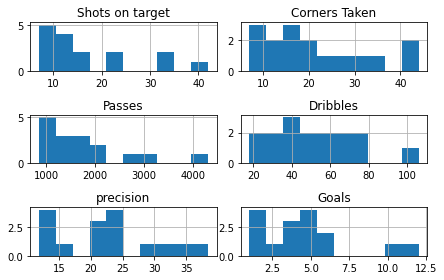

In [40]:
df_model_categ.hist()
plt.tight_layout()

In [29]:
X = df_model_categ.drop(columns=['Goals']).to_numpy()
y = df_model_categ['Goals'].to_numpy().reshape(-1,1)
print(X.shape)
print(y.shape)

(16, 5)
(16, 1)


In [50]:
#Logistic Regression
reg_log = Pipeline([("scaler",StandardScaler()),
                    ("reglog",LogisticRegression())
                   ])

reg_log_params = {
                 "reglog__penalty": ["l1","l2"], 
                 "reglog__C": [0.1,0.5,1.0, 10, 100],
                 "reglog__max_iter":[50,100],
                 "reglog__solver": ['liblinear']
                }

# SVM
svc = Pipeline([
                ('scaler', StandardScaler()),
                ('selectkbest', SelectKBest()),
                ('svc', SVC())
                ])


svc_params = {"selectkbest__k":[3,4, 'all'],
            "svc__C": [0.01, 0.1, 0.3, 0.5, 1.0, 3, 5.0, 10,50], # Parametro de regularizacion
            "svc__kernel": ["linear","poly","rbf"], # Tipo de kernel, probar varios
            "svc__degree": [2,3], # Cuantos grados queremos para el kernel polinomico
            "svc__gamma": [0.001, 0.1, "auto", 1.0, 10.0, 30.0] # Coeficiente de regulaizacion para los kernels rbf, poly y sigmoid
           }

#RandomForest

rand_forest = RandomForestClassifier()



random_forest_params = {"n_estimators": [100, 150],                     
                      "max_depth": [3,5, 6,10, 15], # No le afecta tanto el overfitting como al decissiontree.
                                               # Podemos probar mayores profundidades
                      "max_features": ["sqrt", 3, 4] # Numero de features que utiliza en cada split.
                                                    # cuanto más bajo, mejor generalizará y menos overfitting.        
                     }


In [51]:
#GRIDSEARCH

#Logistic Regression
grid_reg_log = GridSearchCV(reg_log,
                            reg_log_params,
                            cv= 2,
                            scoring= 'accuracy',
                            n_jobs= -1,
                            verbose= True)

#SVC
grid_svc = GridSearchCV(svc,
                        svc_params,
                        cv= 2,
                        scoring= 'accuracy',
                        n_jobs= -1,
                        verbose= True)


#RandomForest
grid_random_forest = GridSearchCV(rand_forest,
                        random_forest_params,
                        cv= 2,
                        scoring= 'accuracy',
                        n_jobs= -1,
                        verbose= True)



In [52]:

grids_models = {'grid_reg_log': grid_reg_log,
                'grid_svc': grid_svc,
                'grid_random_forest':grid_random_forest
                }

In [53]:

for name, grid_search in grids_models.items():
    grid_search.fit(X,y)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
Fitting 2 folds for each of 972 candidates, totalling 1944 fits
Fitting 2 folds for each of 30 candidates, totalling 60 fits


In [54]:
grids_models.items()

dict_items([('grid_reg_log', GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('reglog', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'reglog__C': [0.1, 0.5, 1.0, 10, 100],
                         'reglog__max_iter': [50, 100],
                         'reglog__penalty': ['l1', 'l2'],
                         'reglog__solver': ['liblinear']},
             scoring='accuracy', verbose=True)), ('grid_svc', GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [3, 4, 'all'],
                         'svc__C': [0.01, 0.1, 0.3, 0.5, 1.0, 3, 5.0, 10, 50],
                         'svc__degree': [2, 3],
                         'svc__gamma': [0.001, 0.1, 'auto', 

In [55]:
best_grids = [(i, j.best_score_) for i, j in grids_models.items()]

In [56]:
best_grids

[('grid_reg_log', 0.3125), ('grid_svc', 0.5), ('grid_random_forest', 0.25)]

In [57]:
best_grids = pd.DataFrame(best_grids, columns = ['Grid', 'Best score'])
best_grids.sort_values(by='Best score', ascending=False)

,Grid,Best score
1,grid_svc,0.5000
0,grid_reg_log,0.3125
2,grid_random_forest,0.2500


In [58]:
print("Best estimator:", grid_svc.best_estimator_)
print("Best params:", grid_svc.best_params_)
print("Best score:", grid_svc.best_score_)

Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('selectkbest', SelectKBest(k='all')),
                ('svc', SVC(C=50, degree=2, gamma=0.1))])
Best params: {'selectkbest__k': 'all', 'svc__C': 50, 'svc__degree': 2, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Best score: 0.5


- % de goles por disparo: 40%
- Total shots (inc. Blocked): 102
- Corners Taken: 5
- Passes: 82
- Dribbles: 23

In [67]:
new_team = [[102,5,82,23,40.0]]

In [68]:
df_model_categ.head()

,Shots on target,Corners Taken,Passes,Dribbles,precision,Goals
Team,,,,,,
Croatia,13,14,1076,42,23.529412,4
Czech Republic,13,21,1565,68,23.529412,4
Denmark,10,16,1298,32,28.571429,4
England,11,16,1488,60,31.250000,5
France,22,28,2066,76,12.000000,3


In [69]:
svc = Pipeline([
                ('scaler', StandardScaler()),
                ('selectkbest', SelectKBest(k='all')),
                ('svc', SVC(kernel='rbf', degree=2, C=50, gamma=0.1))
                ])
svc.fit(X,yhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhnhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selectkbest', SelectKBest(k='all')),
                ('svc', SVC(C=50, degree=2, gamma=0.1))])

In [70]:
svc.predict(X)

array([ 4,  4,  4,  5,  3, 10,  5,  6,  2,  2,  6,  1,  5, 12,  5,  2],
      dtype=int64)

<AxesSubplot:>

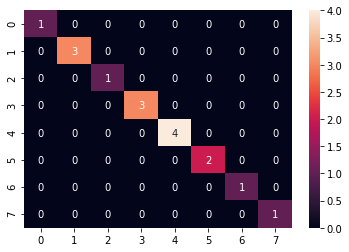

In [74]:
sns.heatmap(confusion_matrix(y,svc.predict(X)), annot=True)

In [71]:
accuracy_score(y, svc.predict(X))

1.0

In [72]:
svc.predict(new_team)

array([5], dtype=int64)